In [53]:
import sympy as sp
from sympy import *
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sp.init_printing()
sp.var('a, x')
sp.var('b1, b2')
y = sp.Function('y')(x)
eq = sp.Eq( sp.diff(y, x),  -a*y )
sp.dsolve(eq) 

In [64]:
sp.var('t, r, rho, vr, p, V2, rho_0, U, G, P, xi, R2, alpha, L_w, gamma')

In [66]:
rho = sp.Function('rho')(t,r)
p = sp.Function('p')(t,r)
v = sp.Function('v')(t,r)

In [67]:
eq1 = sp.Eq( sp.diff(v, t)+v*sp.diff(v, r)+sp.diff(p, r)/rho, 0 )
eq2 = sp.Eq( sp.diff(rho, t)+v*sp.diff(rho, r)+rho*sp.diff(v, r)+2*rho*v/r, 0)
eq3 = sp.Eq( sp.diff(p*rho**(-gamma), t)+v*sp.diff(p*rho**(-gamma), r),    0 )

eq1,eq2,eq3

In [68]:
#from sympy import *
#r, t = symbols('r t') # r (radius), t (angle theta)
#f = symbols('f', cls=Function)
#x = r* cos(t)
#y = r* sin(t)
#g = f(x,y)
#Derivative(g,r, 2).doit()

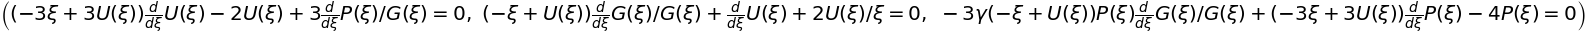

In [69]:
U = sp.Function('U')(xi)
G = sp.Function('G')(xi)
P = sp.Function('P')(xi)

eq4 = sp.Eq(3*(U-xi) * sp.diff(U, xi) -2*U+3*sp.diff(P, xi)/G, 0)
eq5 = sp.Eq((U-xi)*sp.diff(G, xi)/G +sp.diff(U, xi)+2*U/xi, 0)
eq6 = sp.Eq(3*(U-xi)*sp.diff(P, xi)-3*gamma*P*(U-xi)*sp.diff(G, xi)/G-4*P,0)

eq4,eq5,eq6

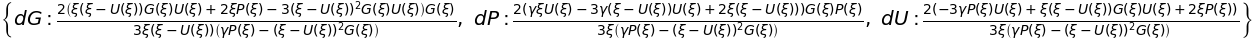

In [75]:
sp.var('dU,dG,dP')

eq7 = sp.Eq(3*(U-xi) * dU -2*U+3*dP/G, 0)
eq8 = sp.Eq((U-xi)*dG/G +dU+2*U/xi, 0)
eq9 = sp.Eq(3*(U-xi)*dP-3*gamma*P*(U-xi)*dG/G-4*P, 0)

eq7,eq8,eq9

dif1=sp.solve ([eq7, eq8, eq9], [dU,dG,dP]) 
dif1

In [52]:
#1階連立常微分方程式（Lorenz方程式）
def func_lorenz(var, t, p, r, b):
    dUdt = -p*var[0] +p*var[1]
    dPdt = -var[0]*var[2] +r*var[0] -var[1]
    dGdt = var[0]*var[1] -b*var[2]

    return [dxdt, dydt, dzdt]


#3d可視化
def plot3d(t_list, var_list):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.set_xlabel("$x$")  #x軸の名前
    ax.set_ylabel("$y$")  #y軸の名前
    ax.set_zlabel("$z$")  #z軸の名前
    ax.plot(var_list[:, 0], var_list[:, 1], var_list[:, 2])

    plt.show()


#メイン実行部
if (__name__ == '__main__'):
    #1階連立常微分方程式（Lorenz方程式）
    t_list = np.linspace(0.0, 100.0, 10000)
    p = 10
    r = 28
    b = 8/3
    var_init = [0.1, 0.1, 0.1]  #3次元座標上での初期値
    var_list = odeint(func_lorenz, var_init, t_list, args=(p, r, b))
    print(var_list)

    #可視化
    plot3d(t_list, var_list)

AttributeError: 'list' object has no attribute 'func'

In [ ]:
'''
#1階連立常微分方程式（Lorenz方程式）
def func_lorenz(var, t, p, r, b):
    dxdt = -p*var[0] +p*var[1]
    dydt = -var[0]*var[2] +r*var[0] -var[1]
    dzdt = var[0]*var[1] -b*var[2]

    return [dxdt, dydt, dzdt]


#3d可視化
def plot3d(t_list, var_list):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.set_xlabel("$x$")  #x軸の名前
    ax.set_ylabel("$y$")  #y軸の名前
    ax.set_zlabel("$z$")  #z軸の名前
    ax.plot(var_list[:, 0], var_list[:, 1], var_list[:, 2])

    plt.show()


#メイン実行部
if (__name__ == '__main__'):
    #1階連立常微分方程式（Lorenz方程式）
    t_list = np.linspace(0.0, 100.0, 10000)
    p = 10
    r = 28
    b = 8/3
    var_init = [0.1, 0.1, 0.1]  #3次元座標上での初期値
    var_list = odeint(func_lorenz, var_init, t_list, args=(p, r, b))
    print(var_list)

    #可視化
    plot3d(t_list, var_list)
'''